In [1]:
import random
import numpy as np
import json
import pickle
import tensorflow as tf

import nltk



from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adedi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adedi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Load the initial intents data from a JSON file
intents = json.loads(open('michade_farms.json').read())

In [4]:
words = []
classes = []
documents = []
ignoreLetters = ['?','!','.',',']

In [5]:
# so for all words into words, word and intent type into documents and if intent type is not already in classes we had it.

for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordlist = nltk.word_tokenize(pattern)
        words.extend(wordlist)
        documents.append((wordlist,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
            
words = [lemmatizer.lemmatize(word) for word in words if word not in ignoreLetters]
words = sorted(set(words))

classes = sorted(set(classes)) # sort and remove duplicates

# pickling the sorted words and classes 
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

In [6]:
# creating  bag of words to represt the document and training list
training = []
outputEmpty = [0] * len(classes)

for document in documents:
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words: bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append(bag + outputRow)
    
random.shuffle(training)
training = np.array(training)

trainX = training[:,:len(words)]
trainY = training[:, len(words):]

In [7]:
# model using keras 
model = tf.keras.Sequential()

# densly connected neural network using trainX
model.add(tf.keras.layers.Dense(128, input_shape = (len(trainX[0]),),activation = 'relu'))

# dropout layer to model which randomly set 50% to 0 at each object training to reduce overfitting
model.add(tf.keras.layers.Dropout(0.5))

# densly connected neural network to add have 64 unit and activation function used in the layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

# densly connected neural network for trainY
model.add(tf.keras.layers.Dense(len(trainY[0]), activation = 'softmax'))
# softmax ensure that the output of the layer represent probablity distrubtion or the possible classes


In [8]:
# stochastic gradient descent optimizer using the following
sgd = tf.keras.optimizers.SGD(learning_rate =0.01, momentum = 0.9, nesterov =True)

# compiling the model specifying the low function as categorical cosentropy, SGD optimizer and metric to evaluate accuracy
model.compile(loss= 'categorical_crossentropy', optimizer = sgd, metrics= ['accuracy'])

# train our varaible
hist = model.fit(np.array(trainX), np.array(trainY), epochs=200, batch_size=5, verbose=1)
model.save('my_model.keras')
print('Done')

Epoch 1/200


60/60 [==============================] - 1s 3ms/step - loss: 2.7817 - accuracy: 0.1174
Epoch 2/200
60/60 [==============================] - 0s 2ms/step - loss: 2.6199 - accuracy: 0.2148
Epoch 3/200
60/60 [==============================] - 0s 2ms/step - loss: 2.3916 - accuracy: 0.2785
Epoch 4/200
60/60 [==============================] - 0s 2ms/step - loss: 2.1168 - accuracy: 0.4094
Epoch 5/200
60/60 [==============================] - 0s 2ms/step - loss: 1.7720 - accuracy: 0.4631
Epoch 6/200
60/60 [==============================] - 0s 2ms/step - loss: 1.4971 - accuracy: 0.5570
Epoch 7/200
60/60 [==============================] - 0s 2ms/step - loss: 1.2486 - accuracy: 0.6275
Epoch 8/200
60/60 [==============================] - 0s 2ms/step - loss: 1.0564 - accuracy: 0.7013
Epoch 9/200
60/60 [==============================] - 0s 2ms/step - loss: 0.8763 - accuracy: 0.7181
Epoch 10/200
60/60 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.7148
Epoch 1

60/60 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9329
Epoch 79/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9262
Epoch 80/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9396
Epoch 81/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9295
Epoch 82/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9396
Epoch 83/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9497
Epoch 84/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9228
Epoch 85/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.9362
Epoch 86/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9262
Epoch 87/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9329
Epoch 88/200


60/60 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.9329
Epoch 160/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9362
Epoch 161/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9497
Epoch 162/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9228
Epoch 163/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9497
Epoch 164/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9430
Epoch 165/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9396
Epoch 166/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9430
Epoch 167/200
60/60 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9430
Epoch 168/200
60/60 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9295
Epoc

2/2 [==============================] - 0s 4ms/step
Confusion Matrix:
[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


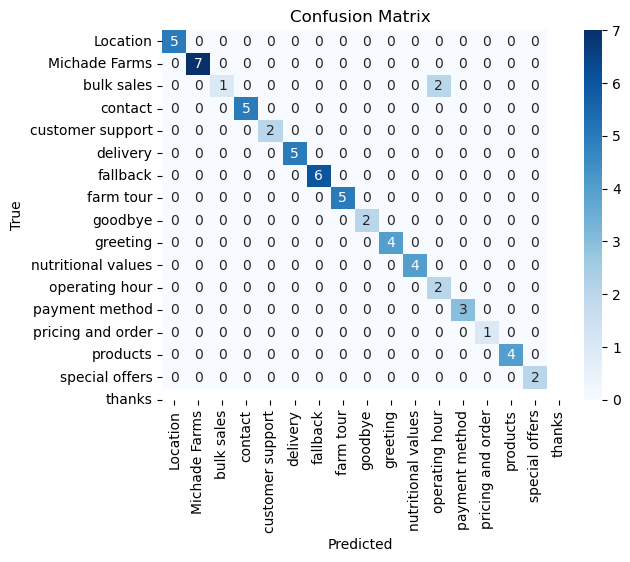

Accuracy: 0.9667
2/2 [==============================] - 0s 4ms/step
Classification Report:
                    precision    recall  f1-score   support

          Location       1.00      1.00      1.00         5
     Michade Farms       1.00      1.00      1.00         7
        bulk sales       1.00      0.33      0.50         3
           contact       1.00      1.00      1.00         5
  customer support       1.00      1.00      1.00         2
          delivery       1.00      1.00      1.00         5
          fallback       1.00      1.00      1.00         6
         farm tour       1.00      1.00      1.00         0
           goodbye       1.00      1.00      1.00         5
          greeting       1.00      1.00      1.00         2
nutritional values       1.00      1.00      1.00         4
    operating hour       1.00      1.00      1.00         4
    payment method       0.50      1.00      0.67         2
 pricing and order       1.00      1.00      1.00         3
        

In [9]:
# import necessary libraries
import random
import numpy as np
import json
import pickle
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# # Split the data into training and testing sets
train_data, test_data = train_test_split(training, test_size=0.2, random_state=42)

trainX = train_data[:, :len(words)]
trainY = train_data[:, len(words):]

testX = test_data[:, :len(words)]
testY = test_data[:, len(words):]



# # Re-Train the model
# hist = model.fit(np.array(trainX), np.array(trainY), epochs=200, batch_size=5, verbose=1)



# Evaluate the model
def evaluate_model(model, testX, testY, classes):
    predictions = model.predict(testX)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(testY, axis=1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'conf_matrix' is your confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()


    # Accuracy
    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report
    predicted_probs = model.predict(testX)
    predicted_classes = np.argmax(predicted_probs, axis=1)
    true_classes = np.argmax(testY, axis=1)
    print("Classification Report:")
    # When calling classification_report
    print(classification_report(true_classes, predicted_classes, labels=np.arange(len(classes)), target_names=classes, zero_division=1))

# 

# Evaluate the model using test data
evaluate_model(model, testX, testY, classes)

# Save the model
model.save('my_model_with_evaluation.keras')
print('Done')
